# Read the DATA

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import os

df_cities = pandas.read_csv('../cities.csv')
df_cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


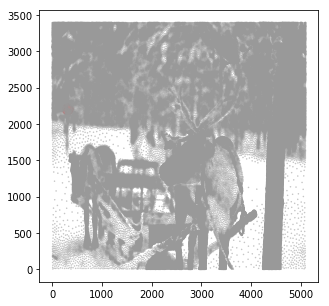

In [4]:
fig = plt.figure(figsize=(5,5))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities['X'],df_cities['Y'],marker = '.',c=(df_cities.CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df_cities.CityId == 0).astype(int)+1)
plt.show()

In [6]:
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # all prime numbers
    primes[0] = False
    primes[1] = False
    for i in range(2,int(numpy.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))

In [11]:
def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            numpy.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

dumbest_path = list(df_cities.CityId[:].append(pandas.Series([0])))
print('Total distance with the dumbest path is '+ "{:,}".format(total_distance(df_cities,dumbest_path)))

Total distance with the dumbest path is 446,884,407.5212135


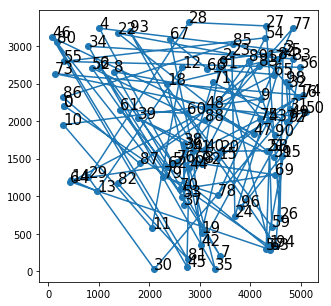

In [13]:
df_path = pandas.merge_ordered(pandas.DataFrame({'CityId':dumbest_path}),df_cities,on=['CityId'])
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)

In [16]:
sorted_cities = list(df_cities.iloc[1:,].sort_values(['X','Y'])['CityId'])
sorted_cities = [0] + sorted_cities + [0]
print('Total distance with the sorted city path is '+ "{:,}".format(total_distance(df_cities,sorted_cities)))

Total distance with the sorted city path is 196,478,811.25956938
